Available Themes: 
- chesterish
- grade3
- gruvboxd
- gruvboxl
    color beach, letras negras
- monokai
- oceans16
- onedork
- solarizedd
- solarizedl
    color beach mas claro

In [1]:
# !jt -l
# !jt -t solarizedl -T
# !jt -r

## Listado de cosas pendientes




__Clusterings a desarrollar__
1. [X] Clustering RFM+
2. [ ] Clustering RF KG Valoración
3. [ ] Clustering RFM KG Valoración
4. [ ] Clustering RFM KG Valoración





__Pasos RFM__
1. [X] Data Customer All
2. [X] Data Facturas All
3. [X] Construcción Caracteristicas a usar
    - [X] Un modelo por cada week tipe
    - [X] Modelo que reemplza W por $C_W$
3. [X] Dispersión puntos RFM
4. [X] Modelo Clustering de R+FM
    - [X] Defionir R, aparte
    - [X] Defionir FxM
    - [X] Calcular Clustering FxM
5. [ ] Descripción del Cluster contruido por R+FM


## Apuntes


La disposicipon de pago, se construye por etapas.

1. [ ] Se define el modelo de regresión general:
   1. [ ] Como forma introductoria **qué es** (Ecuación).
   2. [ ] Se presenta un rago de precios para este modelo de regresión, por medio de un grafico de dispersión.
   3. [ ] Explicación de lo que representan los coeficientes del modelo.
   4. [ ] Diferencias entre la interpretación de estos si es Log()/Nivel.
2. [ ] Se recoge el atributo del modelo llamado Semanas, estas Poseen la particularidad de influir en el precio, como se mencionó anteriormente, es por ello que se adieren en el modelo.
3. [ ] Las semanas.

# Inicio



__Rename__
Recordar que la columna llamada

- `Precio promedio` ahora es `Precio`
- `Centro.1` ahora es `Centro`
- `Centro` ahora es `Centro_Cod`

Presenta los parametros del modelo:

- Dirección datos
- Dirección Graficos
- _Material a analizar_
- _Canal a analizar_
- _Zona de los Datos_
- _Año de inicio de analizis_

Base de datos


`Tipo_de_Cliente`
`Y_producto`
`Año_inicio`

`file_direct_Graphic` 

## Parametros 
data frame `data_i`


> - Producto `i_producto = Y_producto`
> -Para el Canal `Tipo_de_Cliente`
> -Variable a predecir/Grafico `Y_Variable`

Columnas de interes para predecir `X_col`

Diccionario del grupo de columnas `Dic_col`

In [2]:
#===================================
# Archivo
#===================================
Zona_df='Z001'

#===================================
# Clientes
#===================================
Tipo_de_Cliente='Tradicional'

#===================================
# Producto de interes
#===================================
Y_producto='1010078'


#===================================
# Año de Partida
#===================================
Año_inicio='2018'




# Ordenador de escritorio

file_direct_O="C:/Users/user/Documents/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/user/Documents/Data/Data Clear/"
file_direct_Graphic='C:/Users/user/Documents/Graficos'
Png_file_direct_Graphic="C:\\Users\\user\\Documents\\Graficos"
file_direct_Result_Data="C:/Users/user/Documents/Data/Data Resultante/"+Zona_df+"/"
"""

#Notebook
file_direct_O="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"+Zona_df+"/"
file_direct_Clear="C:/Users/rolft/Documents/Repositorios/Data/Data Clear/"
file_direct_Graphic='C:/Users/rolft/Documents/Repositorios/Graficos'
Png_file_direct_Graphic='C:\\Users\\rolft\\Documents\\Repositorios\\Graficos'
"""
#Graficos
file_direct_Graphic_Canal=file_direct_Graphic+"/"+Tipo_de_Cliente
file_direct_Graphic_Canal_Material=file_direct_Graphic_Canal+'/'+Y_producto

Png_file_direct_Graphic_Canal=Png_file_direct_Graphic+'\\'+'Canal '+Tipo_de_Cliente
Png_file_direct_Graphic_Canal_Material=Png_file_direct_Graphic_Canal+'\\'+Y_producto


## Intalar paquetes, Abrir data y ajustarla 

### import

In [3]:
#from adjustText import adjust_text
# from adjustText import *

In [4]:
#=====================================================
                # BASE 
#-----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [5]:
#=====================================================
                # sklearn 
#-----------------------------------------------------

#Separador de datos en train/test
from sklearn.model_selection import train_test_split

#Prediccion Ridge Regression
from sklearn.linear_model import Ridge

In [6]:
#=====================================================
                # statsmodels 
#-----------------------------------------------------
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning


#from statsmodels.regression.mixed_linear_model import MixedLMResults
# No se para qué sirve este

In [7]:
#====================================================
#librerias para crear division de series temporales
#====================================================

from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [8]:
# stopwatch
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec),'\n H:m:s')
#==================================
#          Example
#    input("Press Enter to start")
start_time = time.time()
#    input("Press Enter to stop")
#    end_time = time.time()
#    time_lapsed = end_time - start_time
#    time_convert(time_lapsed)
#=================================

In [9]:
#Histograma con porcentajes
from mizani.formatters import percent_format

### Funciones 
```python
#Mes_name
data_i.Mes.apply(Mes_name)
```
>Transforma la columna mes numerica en el nombre del mes

#### Numero a Meses 

__Forma de crear una etiqueta para un valor especifico__
```python
#[Y_Graph]
dfz=df.copy()
dfz['Año select']=dfz.apply( lambda x: x['Año'] if x['Año']==2020 else '',axis=1)
dfz
```

In [10]:
#===================================
# Dicionario MES
#===================================

#===================================
# Fecha
D=['Enero','Febrero','Marzo','Abril',
 'Mayo','Junio','Julio','Agosto',
 'Septiembre','Octubre',
 'Noviembre','Diciembre']
Month_dic={i:D[i-1]  for i in range(1,13)}
#===========================================


def Mes_name(x):
    D=['Enero','Febrero','Marzo','Abril',
    'Mayo','Junio','Julio','Agosto',
    'Septiembre','Octubre',
    'Noviembre','Diciembre']
    return(D[int(x)-1])

#### Función estandariza ciertas columnas a LN 

In [11]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_ln(dx,ln_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        ln_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in ln_col:
        if(s in df_x.columns):
            print(s)
            df_x[s + '(Escala ln)']=\
            df_x[s].apply(lambda x: np.log(x))
    if(drop_columns):
        df_x.drop(columns = ln_col)
    return(df_x)

## Dicionario 
rename aplicado a `Precio promedio`

In [12]:
Dic_col={'Base':
                             ['Material (Nombre)', 'Kilos Venta KG', 'Precio','Cliente'],
        'Fecha':
                             ['Día natural','Día Semana','Semana', 'Mes', 'Año'],
        'Ubicacion':
                             ['Centro','Población'],
        'Cliente Categoria':
                             ['Cluster','Segmento.1', 'Categoría Cliente'],
        'Cliente Atributos':
                             ['Año Creación', 'Material Favorito','Frecuencia Historica'] 
         ,'RFM Row':
                 ['Recency días','Frecuency_Row','Monetary']
        ,'RFM Customers':
                 ['Recency Actual','Frecuency Actual del Cliente','Monetary Actual']
        ,'Ticket Row':
                 ['Ticket Promedio','Ticket CV']
        ,'Ticket Customers':
                 ['Ticket Promedio Actual','Ticket CV Actual']
        }

### Colores 

[Link colores muestra y configuración](https://www.rapidtables.com/web/color/RGB_Color.html)

In [13]:
('{:X}{:X}{:X}').format(31, 119, 180)
('{:X}{:X}{:X}').format(219, 96, 97)
('{:X}{:X}{:X}').format(87, 219, 95)

'57DB5F'

## Datos
- `data_i_RFM`: Facturaciones 
- `Clientes_i_RFM`: RFM Clientes 
- `Df_Week`: Semanas, Con su respectivo cluster 

### Abrir Archivo   Facturaciones


Se debe agregar el parametro `,index_col='Unnamed: 0'` de esta froma tal vez se pueda hacer un merge en base al indice

##### Formación Datos

###### Abrir csvs 

In [14]:
#======================================================================
# R
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT R'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_R = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('R',data_i_R.shape)


#======================================================================
# F
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT F'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_F = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('F',data_i_F.shape)
#======================================================================
# M
#=====================================================================

file_direct=file_direct_O+'data_1010078_CT M'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

data_i_M = pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
print('M',data_i_M.shape)



R (198596, 19)
F (198596, 19)
M (198596, 20)


###### Merge 

In [15]:
#======================================================================
# RFM
#=====================================================================

print('RF',(pd.merge(data_i_R,data_i_F )).shape)

print('RFM',pd.merge(pd.merge(data_i_R,
                              data_i_F ) ,
                    data_i_M).shape)
DATA_i_RFM = pd.merge(pd.merge(data_i_R,data_i_F ),data_i_M)

del (data_i_R,data_i_F,data_i_M)

RF (198596, 20)
RFM (198596, 22)


#### Funcion

###### def 

In [16]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data_RFM(data):
    start_time = time.time()

    df=data.copy()

# =================================
# ELiminare dodos los valores Nan
# =================================
    #for i in df.columns.to_list():
    #    df=df[df[i].notna()]

    
    
#=================================
# Proceso Recency a Int 
#=================================
        
    df['Recency días']=df['Recency'].apply( lambda x:  x.split(' ')[0])
    
#=================================
# Proceso iterativo Pasar a numero
#=================================

    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               RFM
              ,'Recency días'
              ,'Frecuency_Row'
              ,'Monetary'
              ,'Ingreso de Venta CLP'
             ]:
        
        df[i]=df[i].astype('float64').astype('int64')
    for i in ['Kilos Venta KG'
#               ,'Venta Neta'
              ,'Precio'
#               RFM
              ,'Recency días'
#               ,'Frecuency_Row'
#               ,'Monetary'
               ,'Ingreso de Venta CLP'
             ]:
        df[i]=df[i].astype('int64')     



#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    #Separacion fecha
    
    #ELiminado de DF_FULL
    #df['Semana']=df["Día natural"].apply(lambda x: x.isocalendar()[1] )
    #df['Mes']=df["Día natural"].apply(lambda x: x.month)
    #df['Año']=df["Día natural"].apply(lambda x: x.year)
    #df['Semana']=df['Semana'].astype('int64')
    
#     df['Año']=df['Año'].astype('int64')
#     D_W=['Lunes','Martes','Miércoles','Jueves', 'Viernes','Sábado','Domingo']
#     df['Día Semana']=df["Día natural"].apply(lambda x: D_W[x.isocalendar()[2] -1])
#     df=df[df['Día Semana']!='Domingo']
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return df


###### aplicación 

In [17]:
data_i_RFM=Ajuste_data_RFM(DATA_i_RFM)
data_i_RFM.head(2)

Material (Nombre)       object
Kilos Venta KG           int64
Precio                   int64
Día natural             object
Día Semana              object
Semana                  object
Mes                     object
Año                     object
Población               object
Centro                  object
Cliente                 object
Cluster                 object
Segmento.1              object
Categoría Cliente       object
Año Creación            object
Material Favorito       object
Frecuencia Historica    object
Mes_num                 object
Recency                 object
Frecuency_Row            int64
Ingreso de Venta CLP     int64
Monetary                 int64
Recency días             int64
dtype: object
Time Lapsed = 0:0:1.8406760692596436 
 H:m:s


,Material (Nombre),Kilos Venta KG,Precio,Día natural,Día Semana,Semana,Mes,Año,Población,Centro,...,Categoría Cliente,Año Creación,Material Favorito,Frecuencia Historica,Mes_num,Recency,Frecuency_Row,Ingreso de Venta CLP,Monetary,Recency días
0,1010078(Trutro Entero Selección),22,1300,2020-05-23,Sábado,21,Mayo,2020,La Pintana,Sucursal Lo Espejo,...,Especialista en Proc,2007,1010077,19,5,0 days,1,28600,0,0
1,1010078(Trutro Entero Selección),110,1174,2018-03-01,Jueves,9,Marzo,2018,Puente Alto,Sucursal Lo Espejo,...,Especialista en Crud,2007,1020253,464,3,0 days,1,129140,0,0


### Data Customers
 

#### Abrir Datos RFM Clientes

##### Abrir 

In [18]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Clientes_1010078_CT RFM'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Clientes_i_RFM= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Clientes_i_RFM.head(1)

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Ingreso de Venta Promedio
0,10003742,2020-05-23,521,2020-05-23,0.0033444816053511705,22.0,1300.0,2007.0,19.0,28600.0


In [19]:
Clientes_i_RFM.iloc[1]

Cliente                                    10007508
Fecha ultima Compra                      2021-10-26
Recency Actual                                    0
Fecha Creacion                           2018-03-01
Frecuency Actual del Cliente     0.2017524296094161
Kilos Venta KG Promedio           93.15865384615384
Precio Promedio                  1266.8942307692307
Año Creación Promedio                        2007.0
Frecuencia Historica Promedio                 464.0
Ingreso de Venta Promedio        117683.47115384616
Name: 1, dtype: object

##### Función Ajuste 

###### def  `Ajuste_Clientes_RFM`

In [20]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_Clientes_RFM(data):
    start_time = time.time()
    df=data.copy()

# =============================================================================
# Proceso iterativo Pasar a numero
#------------------------------------------------------------------------------

#----------------------------------------------------------------------
# Float
    for i in [
            #RFM
            'Recency Actual'
            ,'Frecuency Actual del Cliente'
            ,'Ingreso de Venta Promedio'
              
            #Val Fact
            ,'Kilos Venta KG Promedio'
            ,'Precio Promedio'
            
            # Val historicos (ind del producto)
            ,'Año Creación Promedio'
            ,'Frecuencia Historica Promedio'
             ]:
        df[i]=df[i].astype('float64')
        #.astype('int64')
        
        
#------------------------------------------------------------------------ 
    # Int
    for i in [
                #RFM
                'Recency Actual'
#                 ,'Frecuency Actual del Cliente'
#                 ,'Ingreso de Venta Promedio'

                #Val Fact
#                 ,'Kilos Venta KG Promedio'
#                 ,'Precio Promedio'

                # Val historicos (ind del producto)
                ,'Año Creación Promedio'
                ,'Frecuencia Historica Promedio'
                ]:
        df[i]=df[i].astype('int64')
        


#==========================================================================================
# Ajuste de las fechas
#-----------------------------------------------------------------------------------------
    for date in ['Fecha ultima Compra','Fecha Creacion']:
        df[date] = df[date].apply(lambda x: 
                                            datetime.datetime.strptime(str(x),
                                                                           '%Y-%m-%d').date())
    
    print(df.dtypes)
    end_time = time.time()
    time_convert(end_time - start_time)
    return    df.rename(columns={'Ingreso de Venta Promedio':'Monetary Actual'})


##### Aplicación

In [21]:
Clientes_i_RFM=Ajuste_Clientes_RFM(Clientes_i_RFM)

Cliente                           object
Fecha ultima Compra               object
Recency Actual                     int64
Fecha Creacion                    object
Frecuency Actual del Cliente     float64
Kilos Venta KG Promedio          float64
Precio Promedio                  float64
Año Creación Promedio              int64
Frecuencia Historica Promedio      int64
Ingreso de Venta Promedio        float64
dtype: object
Time Lapsed = 0:0:0.09208416938781738 
 H:m:s


In [22]:
Clientes_i_RFM.head()

,Cliente,Fecha ultima Compra,Recency Actual,Fecha Creacion,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual
0,10003742,2020-05-23,521,2020-05-23,0.003344,22.000000,1300.000000,2007,19,28600.000000
1,10007508,2021-10-26,0,2018-03-01,0.201752,93.158654,1266.894231,2007,464,117683.471154
2,10017269,2021-10-23,3,2018-01-27,0.059365,22.038462,1347.782051,2007,101,29699.448718
3,10023880,2021-09-09,47,2018-12-28,0.039591,27.500000,1400.000000,2007,383,38390.000000
4,10028999,2021-09-24,32,2019-11-05,0.017541,22.000000,1320.923077,2007,62,29060.307692


#### Valoración Tipo de Semana Data Clientes

In [23]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=file_direct_O+'Val_Customers_Weeks_1010078_CT 2018_2021'+'.csv'
col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Clientes_Valor_Week= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Clientes_Valor_Week.head()

,Cliente,%△Valoración Promedio \n Tipo de Semana 0,%△Valoración Promedio \n Tipo de Semana 1,%△Valoración Promedio \n Tipo de Semana 2,%△Valoración Promedio \n Tipo de Semana 3,%△Valoración Promedio \n Tipo de Semana 4,Kilos Venta KG Promedio \n Tipo de Semana 0,Kilos Venta KG Promedio \n Tipo de Semana 1,Kilos Venta KG Promedio \n Tipo de Semana 2,Kilos Venta KG Promedio \n Tipo de Semana 3,Kilos Venta KG Promedio \n Tipo de Semana 4
0,10003742,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,22.0,22.0,22.0,22.0,22.0
1,10007508,-0.007185734905445153,0.018077218717184977,0.013714992109052858,0.02452918655320076,0.013855960433295756,89.87777777777778,96.475,95.56060606060606,90.2,110.0
2,10017269,0.03046114456733656,0.019897886066589765,0.03147219540210185,0.0056993826680127755,0.0007512242388005607,21.941176470588236,22.263157894736842,22.0,22.0,22.0
3,10023880,-0.030060387249354177,0.05214065915513532,0.02113362816776547,0.012619280144029242,0.007263220502570363,25.142857142857142,29.333333333333332,30.8,27.919047619047618,26.4
4,10028999,-0.026308968642914484,-0.05027185123667554,0.01544649662663542,-0.07753219431426499,-0.0346666293918049,22.0,22.0,22.0,22.0,22.0


In [24]:
Clientes_Valor_Week.iloc[1]

Cliente                                                     10007508
%△Valoración Promedio \n Tipo de Semana 0      -0.007185734905445153
%△Valoración Promedio \n Tipo de Semana 1       0.018077218717184977
%△Valoración Promedio \n Tipo de Semana 2       0.013714992109052858
%△Valoración Promedio \n Tipo de Semana 3        0.02452918655320076
%△Valoración Promedio \n Tipo de Semana 4       0.013855960433295756
Kilos Venta KG Promedio \n Tipo de Semana 0        89.87777777777778
Kilos Venta KG Promedio \n Tipo de Semana 1                   96.475
Kilos Venta KG Promedio \n Tipo de Semana 2        95.56060606060606
Kilos Venta KG Promedio \n Tipo de Semana 3                     90.2
Kilos Venta KG Promedio \n Tipo de Semana 4                    110.0
Name: 1, dtype: object

#### Calcular Atributos de volumen 
Se contruyen los atributos relacionados al ticket de compra

##### Kilo promedio 

In [25]:
df= data_i_RFM
df_g=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .mean().reset_index()\
        .rename(columns={'Kilos Venta KG':Dic_col['Ticket Customers'][0]})
df_g

,Cliente,Ticket Promedio Actual
0,10003742,22.000000
1,10007508,93.158654
2,10017269,22.038462
3,10023880,27.500000
4,10028999,22.000000
...,...,...
5068,9992154,36.171429
5069,9993925,160.517495
5070,9994662,22.000000
5071,9994800,22.000000


##### CV  Coeficiente de variación 

######  Std

In [26]:
df_G=df[['Cliente','Kilos Venta KG']].groupby('Cliente')\
        .std().reset_index()\
        .rename(columns={'Kilos Venta KG':'Ticket std Actual'})
print(
df_G.isnull().sum()
)
df_G=df_G.fillna(0)
df_G.head()

Cliente                0
Ticket std Actual    367
dtype: int64


,Cliente,Ticket std Actual
0,10003742,0.000000
1,10007508,36.215256
2,10017269,0.612474
3,10023880,12.102631
4,10028999,0.000000


###### Coeficiente de variación 

In [27]:
df_group=pd.merge(df_g,df_G,how='right')

df_group[Dic_col['Ticket Customers'][1]]=\
df_group.apply(lambda x: 
               x['Ticket std Actual']/
               x[Dic_col['Ticket Customers'][0]] ,axis=1)
df_group

,Cliente,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual
0,10003742,22.000000,0.000000,0.000000
1,10007508,93.158654,36.215256,0.388748
2,10017269,22.038462,0.612474,0.027791
3,10023880,27.500000,12.102631,0.440096
4,10028999,22.000000,0.000000,0.000000
...,...,...,...,...
5068,9992154,36.171429,18.376080,0.508027
5069,9993925,160.517495,81.963154,0.510618
5070,9994662,22.000000,0.000000,0.000000
5071,9994800,22.000000,0.000000,0.000000


In [28]:
Dic_col['RFM Customers'][1]

'Frecuency Actual del Cliente'

#### Merge 

In [29]:
Clientes_i=pd.merge(Clientes_i_RFM,df_group)
print(Clientes_i.shape)
Clientes_i=pd.merge(Clientes_Valor_Week,Clientes_i)
print(Clientes_i.shape)
Clientes_i['$F^{-1}$ Actual']=\
    Clientes_i[Dic_col['RFM Customers'][1]].apply( lambda x: x**(-1))
Clientes_i.shape

(5073, 13)
(5073, 23)


(5073, 24)

In [30]:
Clientes_i.head()

,Cliente,%△Valoración Promedio \n Tipo de Semana 0,%△Valoración Promedio \n Tipo de Semana 1,%△Valoración Promedio \n Tipo de Semana 2,%△Valoración Promedio \n Tipo de Semana 3,%△Valoración Promedio \n Tipo de Semana 4,Kilos Venta KG Promedio \n Tipo de Semana 0,Kilos Venta KG Promedio \n Tipo de Semana 1,Kilos Venta KG Promedio \n Tipo de Semana 2,Kilos Venta KG Promedio \n Tipo de Semana 3,...,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10003742,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,22.0,22.0,22.0,22.0,...,0.003344,22.000000,1300.000000,2007,19,28600.000000,22.000000,0.000000,0.000000,299.000000
1,10007508,-0.007185734905445153,0.018077218717184977,0.013714992109052858,0.02452918655320076,0.013855960433295756,89.87777777777778,96.475,95.56060606060606,90.2,...,0.201752,93.158654,1266.894231,2007,464,117683.471154,93.158654,36.215256,0.388748,4.956570
2,10017269,0.03046114456733656,0.019897886066589765,0.03147219540210185,0.0056993826680127755,0.0007512242388005607,21.941176470588236,22.263157894736842,22.0,22.0,...,0.059365,22.038462,1347.782051,2007,101,29699.448718,22.038462,0.612474,0.027791,16.845022
3,10023880,-0.030060387249354177,0.05214065915513532,0.02113362816776547,0.012619280144029242,0.007263220502570363,25.142857142857142,29.333333333333332,30.8,27.919047619047618,...,0.039591,27.500000,1400.000000,2007,383,38390.000000,27.500000,12.102631,0.440096,25.258465
4,10028999,-0.026308968642914484,-0.05027185123667554,0.01544649662663542,-0.07753219431426499,-0.0346666293918049,22.0,22.0,22.0,22.0,...,0.017541,22.000000,1320.923077,2007,62,29060.307692,22.000000,0.000000,0.000000,57.008334


### Data Week

In [31]:
# file_direct_O+'Weeks_clusters_1010078_CT_2018_2021 Other val 2020_2021'+'.csv'

##### Abrir 

In [32]:
#======================================================================
# Se Cargan los datos de ventas con las caracteristicas de los clientes
#=====================================================================

file_direct=\
file_direct_O+'Weeks_clusters_1010078_CT_2018_2021 Other val 2020_2021'+'.csv'

col_names=pd.read_csv(file_direct,
                      encoding="utf-8",sep=";",nrows=0).columns

types_dict = {col: str for col in list(col_names)}

Df_Week= pd.read_csv(file_direct,
                   encoding="utf-8",sep=";",dtype=types_dict
                      ,index_col='Unnamed: 0'
                      )

# Se debe agregar el parametro ,index_col='Unnamed: 0' 
# de esta froma tal vez se pueda hacer un merge en base al indice

#elimina una columna en especifico
#DF_FULL.drop('Año natural', inplace=True, axis=1)
Df_Week.head(1)

,Variable,Atributo,Semana,Ingresos de Venta,Cant compras,Precio Promedio Ponderado CLP / KG,Ventas promedio Kg,Precio Promedio,Coef.,$e^{βi}$,$\%\triangle Y$,Tipo de Semana
0,Semana_1,Semana,1,210715690,1688,1401.8833868896738,89.04561611374407,1486.5527251184835,0.0,1.0,0.0,3


## data con Week type 
`data_i_RFM_week`

In [33]:
Df_Week[['Semana','Tipo de Semana']].dtypes

Semana            object
Tipo de Semana    object
dtype: object

In [34]:
data_i_RFM[['Semana','Año']].dtypes

Semana    object
Año       object
dtype: object

In [35]:
data_i_RFM_week=pd.merge(
Df_Week[['Semana','Tipo de Semana']]
,data_i_RFM#[['Semana','Año']]
,how='inner')
print(data_i_RFM.shape[0] - data_i_RFM_week.shape[0])

0


# Data solo RFM  

`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`


- `Estado_R(x):` función de apply
- `DF_Estado_R(DF):` Función modifica recency
- `Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

Descripción

__Primera segmentación a sobre R__
>Thus, a customer is Active if he has purchased in recent 90 days; he is Lapsing if his last purchase is between 90 and 360 days and he is Lapsed if he has not purchased in recent 365 days

##### Extracto publicación 

###### __Combinación lineal entre Frequency y Monetary__
$(F \times W_F + M \times W_M)$


$
(F \times W_F + M \times W_M)
$

Se probó diferentes combinaciones de $W_F$ y $W_M$


__Finding the best Weights for the feature of (F × WF + M × WM):__ 
>In order to find the best values for WF and WM, we checked the values from 0 to 10 with step size of 0.1 for each of the Frequency and Monetary and tried to select the best values according to the result of clustering. In this process, we found 3 general clustering shapes and Fig. 2 shows them with their weights for the Active segment. We will show the selected segmentation model in the following part.
4)
>>Para encontrar los mejores valores para WF y WM, verificamos los valores de 0 a 10 con un tamaño de paso de 0.1 para cada Frecuencia y Monetario e intentamos seleccionar los mejores valores de acuerdo con el resultado de la agrupación. En este proceso, encontramos 3 formas generales de agrupamiento y la Fig. 2 las muestra con sus pesos para el segmento Activo. Mostraremos el modelo de segmentación seleccionado en la siguiente parte. 4)


###### __Finding the best Number of Segments (best K for K-Means):__




>We use K-Means, as one the most applied clustering method, in order to find the best segments for our customers. For finding the best K for our K-Means model, we hold several meetings with project managers and marketing team. According to the meetings, we understood that E-Commerce companies need 3 segments of High-Value, Medium-Value and Low-Value based on the loyalty of their customers. Moreover, they need to be able to find the difference between the Medium-Value users who have high Frequency and low Monetary with the users who have low Frequency and high Monetary. Accordingly, we decided to have 4 segments of High Value, Medium Value with High Monetary (cusotmers with high Monetary but low Frequency), Medium Value with High Frequency (cusotmers with low Monetary but high Frequency) and Low-Value for our Active customers. Since the difference between the two segments of Medium Value with High Monetary and Medium Value with High Frequency is not useful for the users who have not purchased recently, we have 3 segments of High Value, Medium Value and Low Value for the Lapsing and Lapsed Customers. The reason is that the goal for the Lapsing segment is avoiding them from being churned and the goal for the Lapsed segment is encouraging them to return and there is no meaningful difference between Medium High Monetary and Medium High Frequency. As a result, we need only one segment for our Medium Value customers in Lapasing and Lapsed Segments.
>>Utilizamos K-Means, como uno de los métodos de agrupación más aplicados, para encontrar los mejores segmentos para nuestros clientes. 

>>Para encontrar la mejor K para nuestro modelo K-Means, llevamos a cabo varias reuniones con los gerentes de proyecto y el equipo de marketing. Según las reuniones, entendimos que las empresas de comercio electrónico necesitan 3 segmentos de valor alto, valor medio y valor bajo en función de la lealtad de sus clientes. 

>>Además, deben poder encontrar la diferencia entre los usuarios de valor medio que tienen alta frecuencia y bajo valor monetario con los usuarios que tienen baja frecuencia y alto valor monetario. 

>>En consecuencia, decidimos tener 4 segmentos de Alto Valor, Valor Medio con Alta Monetaria (clientes con alta Monetaria pero baja Frecuencia), Valor Medio con Alta Frecuencia (clientes con baja Monetaria pero alta Frecuencia) y Bajo Valor para nuestros clientes Activos. Dado que la diferencia entre los dos segmentos de valor medio con alto valor monetario y valor medio con alta frecuencia no es útil para los usuarios que no han comprado recientemente, tenemos 3 segmentos de valor alto, valor medio y valor bajo para los clientes vencidos y vencidos. . La razón es que el objetivo del segmento Caducado es evitar que se abandonen y el objetivo del segmento Caducado es alentarlos a regresar y no hay una diferencia significativa entre Monetario medio alto y Frecuencia media alta. Como resultado, solo necesitamos un segmento para nuestros clientes de valor medio en los segmentos vencidos y vencidos.

## Datos y columnas 

### Columnas y Data


Se toma el data frame `Clientes_i` seleccionado las columnas RFM custom mas id cliente
y se guarda en `RFM_Customers`

`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`

##### Columnas 

###### Data clientes

In [36]:
Clientes_i.head()

,Cliente,%△Valoración Promedio \n Tipo de Semana 0,%△Valoración Promedio \n Tipo de Semana 1,%△Valoración Promedio \n Tipo de Semana 2,%△Valoración Promedio \n Tipo de Semana 3,%△Valoración Promedio \n Tipo de Semana 4,Kilos Venta KG Promedio \n Tipo de Semana 0,Kilos Venta KG Promedio \n Tipo de Semana 1,Kilos Venta KG Promedio \n Tipo de Semana 2,Kilos Venta KG Promedio \n Tipo de Semana 3,...,Frecuency Actual del Cliente,Kilos Venta KG Promedio,Precio Promedio,Año Creación Promedio,Frecuencia Historica Promedio,Monetary Actual,Ticket Promedio Actual,Ticket std Actual,Ticket CV Actual,$F^{-1}$ Actual
0,10003742,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,-0.0652580488718174,22.0,22.0,22.0,22.0,...,0.003344,22.000000,1300.000000,2007,19,28600.000000,22.000000,0.000000,0.000000,299.000000
1,10007508,-0.007185734905445153,0.018077218717184977,0.013714992109052858,0.02452918655320076,0.013855960433295756,89.87777777777778,96.475,95.56060606060606,90.2,...,0.201752,93.158654,1266.894231,2007,464,117683.471154,93.158654,36.215256,0.388748,4.956570
2,10017269,0.03046114456733656,0.019897886066589765,0.03147219540210185,0.0056993826680127755,0.0007512242388005607,21.941176470588236,22.263157894736842,22.0,22.0,...,0.059365,22.038462,1347.782051,2007,101,29699.448718,22.038462,0.612474,0.027791,16.845022
3,10023880,-0.030060387249354177,0.05214065915513532,0.02113362816776547,0.012619280144029242,0.007263220502570363,25.142857142857142,29.333333333333332,30.8,27.919047619047618,...,0.039591,27.500000,1400.000000,2007,383,38390.000000,27.500000,12.102631,0.440096,25.258465
4,10028999,-0.026308968642914484,-0.05027185123667554,0.01544649662663542,-0.07753219431426499,-0.0346666293918049,22.0,22.0,22.0,22.0,...,0.017541,22.000000,1320.923077,2007,62,29060.307692,22.000000,0.000000,0.000000,57.008334


###### Columnas RFM

`Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']]`

In [37]:
Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']]

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual
0,10003742,521,0.003344,28600.000000
1,10007508,0,0.201752,117683.471154
2,10017269,3,0.059365,29699.448718
3,10023880,47,0.039591,38390.000000
4,10028999,32,0.017541,29060.307692
...,...,...,...,...
5068,9992154,69,0.056885,46135.600000
5069,9993925,0,0.408158,200374.351750
5070,9994662,12,0.015996,28700.000000
5071,9994800,118,0.025931,27060.000000


##### Copia especifica

Se copia  
`RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()`

In [38]:
RFM_Customers=Clientes_i_RFM[['Cliente']+Dic_col['RFM Customers']].copy()

### R+  Recency to Actividad del cliente
Se contruye una columna con el atributo estado de actividad del cliente.
Estado_R(x), aplicado a RFM_custo

#### Función crea atributo Actividad del cliente 

- `Estado_R(x):` función de apply
- `DF_Estado_R(DF):` Función modifica recency

In [39]:
def Estado_R(x):
    """
    Cortes 0-89|90-364|365-
    Uso:
    RFM_Customers['Actividad del cliente']=\
    RFM_Customers['Recency Actual'].apply(lambda r: Estado_R(r)  )
    
    O por DF_Estado_R(DF)
    """
    if(x<=90):
        return('Activo')
    elif(90<x<=365):
        return('Fugandose')
    else:
        return('Fugado')
    
def DF_Estado_R(DF):
    """
    Cortes 0-89|90-364|365-
    Uso: Estado_R
    Requiere columna: 'Recency Actual'
        """
    DF['Actividad del cliente']=\
    DF['Recency Actual'].apply(lambda r: Estado_R(r) )
    return(DF)

DF_Estado_R(RFM_Customers)
RFM_Customers.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente
0,10003742,521,0.003344,28600.000000,Fugado
1,10007508,0,0.201752,117683.471154,Activo
2,10017269,3,0.059365,29699.448718,Activo
3,10023880,47,0.039591,38390.000000,Activo
4,10028999,32,0.017541,29060.307692,Activo


#### Resultado

<AxesSubplot:>

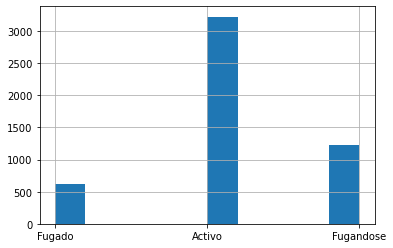

In [40]:
RFM_Customers['Actividad del cliente'].hist()

c:\Users\user\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


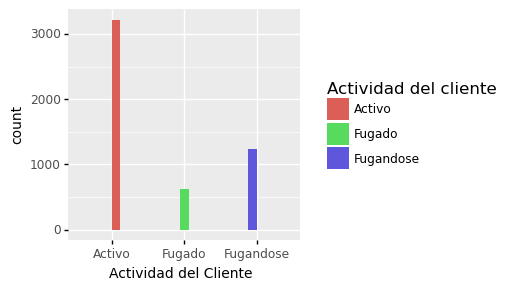

<ggplot: (126118658675)>

In [41]:
List_Colores=['#1F77B4', '#DB6061','#57DB5F']
(ggplot(
    RFM_Customers
    ,aes(x= 'Actividad del cliente'
#         ,y=after_stat('width*density')
         ,fill='Actividad del cliente'
        ))
    
    +geom_histogram(size=20)
#         List_Colores[i]bins=30,alpha=1)
#      +scale_x_discrete(breaks= range(0,1100))
#     + scale_y_continuous(labels=percent_format()) # display labels as a percentage
       
    +xlab('Actividad del Cliente')
#     +ylab('Porcentaje  de '+['Clientes','Facturaciones','Clientes'][0])
#     +ggtitle('')
    
    +theme(#axis_text_x = element_text(angle=90, hjust=1),
           figure_size=(3,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12)
    
    )#theme
    )

###### Tabla latex descripción RFM Actividad del cliente 

In [42]:
rfm_df=RFM_Customers.copy()
Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)

rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))

#Listas
L_round=[0,0,0]
List_Tab=list()

for i in range(3):
#     i=1
    if(i==1):
        
        List_Tab.append(rfm_df[['Actividad del cliente', 'Frecuency-1' ]]\
        .groupby('Actividad del cliente').describe()\
        ['Frecuency-1'].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=['Frecuency-1' for j in range(3)]
    else:    
        List_Tab.append(rfm_df[['Actividad del cliente', Dic_col['RFM Customers'][i] ]]\
        .groupby('Actividad del cliente').describe()\
        [Dic_col['RFM Customers'][i]].reset_index()\
        .round(L_round[i]))
        List_Tab[i]['Atributo']=[Dic_col['RFM Customers'][i] for j in range(3)]
        
#     List_Tab[i]=List_Tab[i].drop(columns=['count'])
    List_Tab[i].set_index('Atributo')
# pd.concat(List_Tab  )
# List_Tab[0].set_index('Atributo')
print(pd.concat(List_Tab  ).set_index(['Atributo','Actividad del cliente']).to_latex\
          (float_format="{:,.0f}".format)
     
     )

\begin{tabular}{llrrrrrrrr}
\toprule
                &        &  count &   mean &     std &    min &    25\% &    50\% &    75\% &       max \\
Atributo & Actividad del cliente &        &        &         &        &        &        &        &           \\
\midrule
Recency Actual & Activo &  3,222 &     26 &      26 &      0 &      4 &     14 &     46 &        90 \\
                & Fugandose &  1,232 &    194 &      78 &     91 &    123 &    180 &    257 &       365 \\
                & Fugado &    619 &    566 &     203 &    367 &    446 &    517 &    567 &     1,369 \\
Frecuency-1 & Activo &  3,222 &     45 &      45 &      2 &     11 &     30 &     64 &       319 \\
                & Fugandose &  1,232 &    127 &      75 &      2 &     71 &    115 &    172 &       324 \\
                & Fugado &    619 &    201 &      98 &      7 &    113 &    185 &    299 &       323 \\
Monetary Actual & Activo &  3,222 & 83,983 & 175,184 & 24,200 & 29,134 & 32,110 & 62,506 & 2,754,333 \\
      

###### Histograma 

In [43]:
#DATA
#copy
rfm_df=RFM_Customers.copy()
Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)
rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))


In [44]:
rfm_df.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente', 'Frecuency-1'],
      dtype='object')

In [45]:
# rfm_df.columns
L_df_Col=list()
for c in Dic_col['RFM Customers']:
    L_df_Col.append(
    pd.DataFrame( 
        {'Valor': rfm_df[c].to_list()
        ,'Atributo':[c for i in range(rfm_df.shape[0])]
        ,'Actividad del cliente':rfm_df['Actividad del cliente']
        }
                )
    )
df_col=pd.concat(L_df_Col)
df_col.Valor=df_col.Valor.astype('float64')

c:\Users\user\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 71'. Pick better value with 'binwidth'.


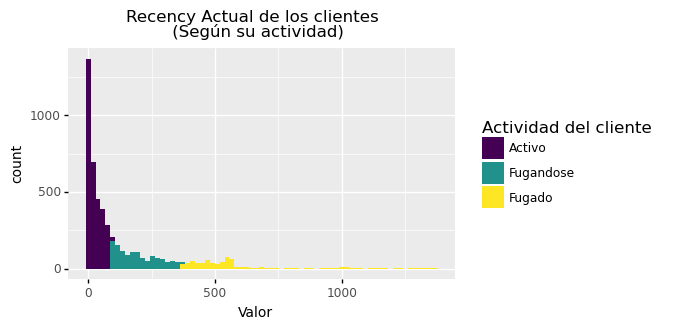

c:\Users\user\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 87'. Pick better value with 'binwidth'.


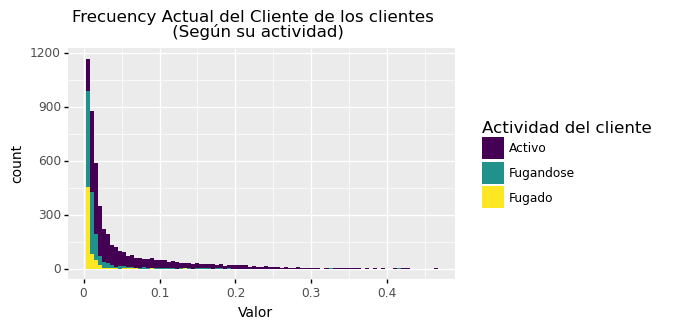

c:\Users\user\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 1429'. Pick better value with 'binwidth'.


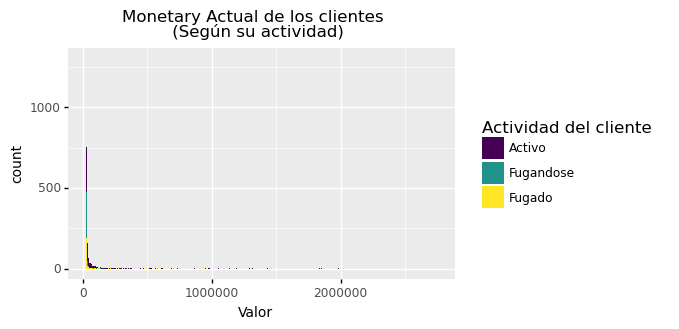

[<ggplot: (126119370487)>, <ggplot: (126119384314)>, <ggplot: (126119378429)>]

In [46]:
# Df_mean['Tip_sem_name']=Df_mean['Tipo de Semana'].apply(lambda x: 'Tipo de Semana '+ x )
Graph_Hist_sin_Nan= \
[
    (
    ggplot(
    df_col[df_col['Atributo']==i]
    ,aes(x='Valor'
#          ,y=after_stat('width*density')
        ,fill='Actividad del cliente'
        ))
    
    #configuración histograma
    +geom_histogram()
#     bins=30,alpha=1
    #Escala porcentual en X
#      +scale_x_continuous(labels=percent_format())
    
#     Escala porcentual en X
#     + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     + facet_grid('.~Actividad del cliente')
#     Dimensiones de cada grafico
    +theme( 
#             legend_position='none',
            figure_size=(5,3),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12))
    
#     +ylab('Porcentaje  de \n los '+ str(list_df[0].shape[0]) +' clientes')
#      +xlab('Ingresos en Miles de CLP')

#     Titulo de cada histograma
     +ggtitle(i +' de los clientes \n (Según su actividad)')
    
    ) 
    for i in Dic_col['RFM Customers']
]
Graph_Hist_sin_Nan

## Funciones de ajuste de RFM 

### Función Estandarizadora Normalizado

 `data_Norm_satandar(dx,Normalizad_col,drop_columns)`


`pd.DataFrame(StandardScaler().fit_transform(X_std),columns=X_std.columns)`

In [65]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_Norm_satandar(dx,Normalizad_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        Min_Max_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in Normalizad_col:
        if(s in df_x.columns):
            mean_df=df_x[s].mean()
            std_df_s=df_x[s].std()
            df_x[s + ' (Normalizado)']=\
            df_x[s].apply(lambda x: (x-mean_df)/(std_df_s))
        else:
            print('No se pudo transformar ',s)
    if(drop_columns):
        df_x=df_x.drop(columns = Normalizad_col)
    return(df_x)

### Función estandariza ciertas columnas a Min_Max 
_No se recomienda usar ya que se presentan clientes outliers._
Se debe aplicar despues de aplicar el $Ln$()

[Min Max Forma](https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79)


$x_{scaled}=\dfrac{x-min(x)}{max(x)-min(x)}$


`data_Min_Max(dx,Min_Max_col,drop_columns)`

In [58]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_Min_Max(dx,Min_Max_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        Min_Max_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in Min_Max_col:
        if(s in df_x.columns):
            Min_df_s=df_x[s].min()
            Max_df_s=df_x[s].max()
            df_x[s + ' (Escala Min Max)']=\
            df_x[s].apply(lambda x: (x-Min_df_s)/(Max_df_s -Min_df_s))
        else:
            print('No se pudo transformar ',s)
    if(drop_columns):
        df_x=df_x.drop(columns = Min_Max_col)
    return(df_x)

### Función estandariza ciertas columnas a LN 

`data_ln(dx,ln_col,drop_columns)`

In [ ]:
# ['Frecuency Actual del Cliente','Monetary Actual']
def data_ln(dx,ln_col,drop_columns):
    """
    Pasa un listado de columnas a Ln
    
        dx: dataframe
        ln_col: (Array) Listado de columnas a escalar 
        drop_columns: (True or False)  Eliminar columnas del listado
    """
    df_x=dx.copy()
    for s in ln_col:
        if(s in df_x.columns):
#             print(s)
            df_x[s + ' (Escala ln)']=\
            df_x[s].apply(lambda x: np.log(x))
        else:
            print('No se pudo transformar ',s)
    if(drop_columns):
        df_x=df_x.drop(columns = ln_col)
    return(df_x)

### Función creación FxM 
`Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):`

In [ ]:
data_Min_Max(RFM_Customers,[ 'Frecuency Actual del Cliente','Monetary Actual'], True).columns

Index(['Cliente', 'Recency Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala Min Max)',
       'Monetary Actual (Escala Min Max)'],
      dtype='object')

###### Data_ln 

In [ ]:
# data_Min_Max(RFM_Customers,[ 'Frecuency Actual del Cliente','Monetary Actual'], True).columns
data_ln( data_Min_Max(
    RFM_Customers,
    [ 'Frecuency Actual del Cliente','Monetary Actual'], False),
    [i + ' (Escala Min Max)'
     for i in [ 'Frecuency Actual del Cliente','Monetary Actual']]
           , True)

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln)
0,10003742,521,0.003344,28600.000000,Fugado,-7.487191,-5.854068
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767
3,10023880,47,0.039591,38390.000000,Activo,-2.537324,-5.047931
4,10028999,32,0.017541,29060.307692,Activo,-3.463699,-5.797435
...,...,...,...,...,...,...,...
5068,9992154,69,0.056885,46135.600000,Activo,-2.149520,-4.684781
5069,9993925,0,0.408158,200374.351750,Activo,-0.130703,-2.729784
5070,9994662,12,0.015996,28700.000000,Activo,-3.576756,-5.841489
5071,9994800,118,0.025931,27060.000000,Fugandose,-3.006027,-6.070902


###### Def  FxM función
`Df_Pond_FxM(RFM_df,weighted_F,weighted_M): `

In [ ]:
def Df_Pond_FxM(RFM_df ,  Col_FM , weighted_F,weighted_M):
    """
    Entrega un df:
    Df_Pond_FxM(RFM_df,W_F,W_M):
    W_F pond de F
    W_M pond de M
    Col_FM:(F,M)
    """

    df=RFM_df.copy()
#     Ln_B=True
#     Ln_B=False
#     if(Ln_B):
#         df['$(F \times W_F + M \times W_M)$']=df.apply(lambda x:
#             x[ 'Frecuency Actual del Cliente' + ' (Escala ln)']* weighted_F +\
#             x['Monetary Actual'+ ' (Escala ln)']*weighted_M,axis=1 )
#     else:
    if((Col_FM[0] in df.columns)&(Col_FM[1] in df.columns)):
        df['$(F \times W_F + M \times W_M)$']=df.apply(lambda x:
            x[Col_FM[0]]* weighted_F +\
            x[Col_FM[1]]*weighted_M,axis=1 )
    else:
        print('Col_FM entregado no corresponde con las oclumnas de df',Col_FM)
    return df

In [ ]:
# (Escala ln)
# RFM_df =Df_Pond_FxM(RFM_Customers,1,1)
RFM_df =Df_Pond_FxM(
    data_ln( data_Min_Max(RFM_Customers
                          ,[ 'Frecuency Actual del Cliente','Monetary Actual'], False)
            ,[i + ' (Escala Min Max)'for i in [ 'Frecuency Actual del Cliente','Monetary Actual']],True)
            ,[i + ' (Escala Min Max) (Escala ln)'for i in [ 'Frecuency Actual del Cliente','Monetary Actual']]
            ,1,1)

RFM_df.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln),$(F \times W_F + M \times W_M)$
0,10003742,521,0.003344,28600.000000,Fugado,-7.487191,-5.854068,-13.341259
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390,-4.189531
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767,-7.828217
3,10023880,47,0.039591,38390.000000,Activo,-2.537324,-5.047931,-7.585255
4,10028999,32,0.017541,29060.307692,Activo,-3.463699,-5.797435,-9.261134


In [ ]:
RFM_df[RFM_df['Actividad del cliente']=='Activo'].describe().T

,count,mean,std,min,25%,50%,75%,max
Recency Actual,3222.0,25.846369,25.994297,0.000000,4.000000,14.000000,46.000000,9.000000e+01
Frecuency Actual del Cliente,3222.0,0.064938,0.071229,0.003137,0.015625,0.033469,0.091081,4.616323e-01
Monetary Actual,3222.0,83982.651934,175184.007755,24200.000000,29134.285714,32110.014286,62506.269231,2.754333e+06
Frecuency Actual del Cliente (Escala Min Max) (Escala ln),3222.0,-2.685229,1.254528,-9.099217,-3.605914,-2.720873,-1.657489,-6.707132e-03
Monetary Actual (Escala Min Max) (Escala ln),3222.0,-4.901801,1.231030,-6.668167,-5.788625,-5.486439,-4.187884,-7.543815e-03
$(F \times W_F + M \times W_M)$,3222.0,-7.587030,2.161761,-14.722240,-9.314249,-8.010544,-5.796755,-1.118787e+00


## Analisis  R+ 

### Histograma 

#### Data 

In [ ]:
#DATA
#copy
rfm_df=RFM_Customers.copy()
Ac_T=pd.CategoricalDtype(categories=['Activo', 'Fugandose','Fugado'], ordered=True)
rfm_df['Actividad del cliente']=pd.Series(rfm_df['Actividad del cliente'], dtype=Ac_T)
rfm_df['Frecuency-1']=rfm_df[ Dic_col['RFM Customers'][1] ].apply(lambda x: x**(-1))


In [ ]:
rfm_df.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente', 'Frecuency-1'],
      dtype='object')

In [ ]:
# rfm_df.columns
L_df_Col=list()
for c in Dic_col['RFM Customers']:
    L_df_Col.append(
    pd.DataFrame( 
        {'Valor': rfm_df[c].to_list()
        ,'Atributo':[c for i in range(rfm_df.shape[0])]
        ,'Actividad del cliente':rfm_df['Actividad del cliente']
        }
                )
    )
df_col=pd.concat(L_df_Col)
df_col.Valor=df_col.Valor.astype('float64')

In [ ]:
data_ln(df_col,['Valor'],False)

,Valor,Atributo,Actividad del cliente,Valor (Escala ln)
0,521.00000,Recency Actual,Fugado,6.255750
1,0.00000,Recency Actual,Activo,-inf
2,3.00000,Recency Actual,Activo,1.098612
3,47.00000,Recency Actual,Activo,3.850148
4,32.00000,Recency Actual,Activo,3.465736
...,...,...,...,...
5068,46135.60000,Monetary Actual,Activo,10.739340
5069,200374.35175,Monetary Actual,Activo,12.207943
5070,28700.00000,Monetary Actual,Activo,10.264652
5071,27060.00000,Monetary Actual,Fugandose,10.205812


#### GRaifco 

c:\Users\user\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 24'. Pick better value with 'binwidth'.


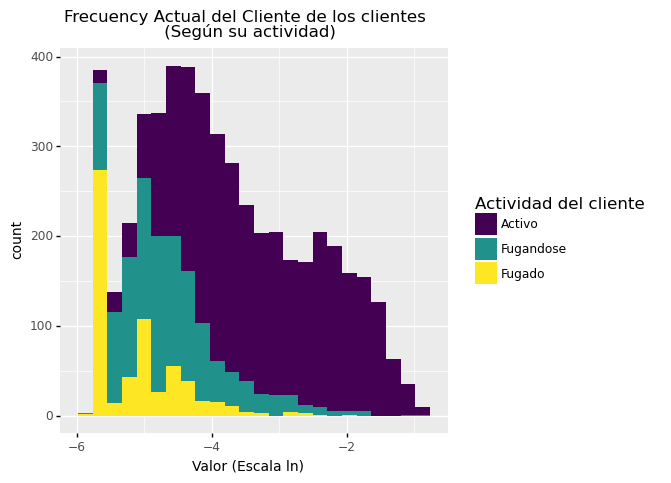

c:\Users\user\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 92'. Pick better value with 'binwidth'.


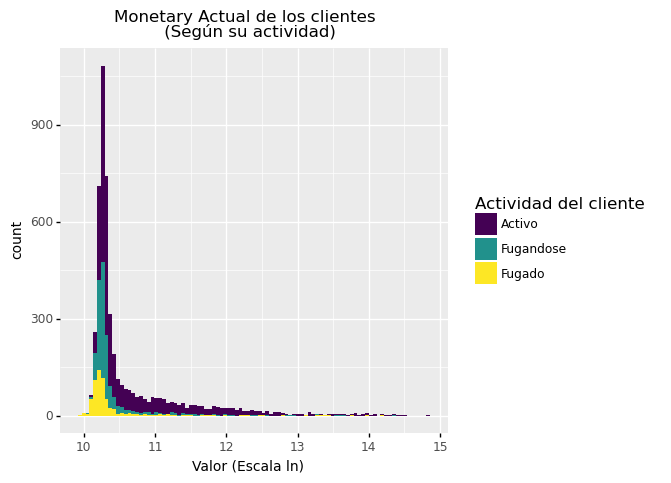

[<ggplot: (136180317465)>, <ggplot: (136179660674)>]

In [ ]:
# Df_mean['Tip_sem_name']=Df_mean['Tipo de Semana'].apply(lambda x: 'Tipo de Semana '+ x )
Graph_Hist_sin_Nan= \
[
    (
    ggplot(
    data_ln(
    df_col[df_col['Atributo']==i],['Valor'],False)
    ,aes(x='Valor (Escala ln)'
#          ,y=after_stat('width*density')
        ,fill='Actividad del cliente'
        ))
    
    #configuración histograma
    +geom_histogram()
#     bins=30,alpha=1
    #Escala porcentual en X
#      +scale_x_continuous(labels=percent_format())
    
#     Escala porcentual en X
#     + scale_y_continuous(labels=percent_format()) # display labels as a percentage
    
#     + facet_grid('.~Actividad del cliente')
#     Dimensiones de cada grafico
    +theme( 
#             legend_position='none',
            figure_size=(5,5),
            axis_title_x=element_text(size = 10),
            axis_title_y=element_text(size = 10),
            title=element_text(size = 12))
    
#     +ylab('Porcentaje  de \n los '+ str(list_df[0].shape[0]) +' clientes')
#      +xlab('Ingresos en Miles de CLP')

#     Titulo de cada histograma
     +ggtitle(i +' de los clientes \n (Según su actividad)')
    
    ) 
    for i in Dic_col['RFM Customers'][1:]
]
Graph_Hist_sin_Nan

# Funciones relacionadas a K-means

`Curva_kmeans(D_Clientes_Frec,Col)`

`Columnas_def(X_std):`

## Funciones de ajuste 

### Curva Cantidad de Clusters en KMeans 
`Curva_kmeans`

###### Función 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Col=['Frecuency Actual del Cliente','Monetary Actual',
    '$(F \times W_F + M \times W_M)$'
    ]

def Curva_kmeans(D_Clientes_Frec,Col):
    X=D_Clientes_Frec.fillna(0)
    X_std=X[Col].copy()


    
    X_std =\
    pd.DataFrame(StandardScaler().fit_transform(X_std),columns=X_std.columns)


    #kmeans = KMeans(n_clusters=6)



    #la suma del error cuadrático para diferentes valores de k
    SSE = []
    for i in range(1, 21):
      km = KMeans(n_clusters=i)
      km.fit(X_std)
      SSE.append(km.inertia_)

    # plot

    plt.plot(range(1, 21), SSE,'-o', color='black')
    plt.xlabel('Número of clusters')
    plt.ylabel('SSE')
    plt.show()
    return(X_std)


#### Resultado


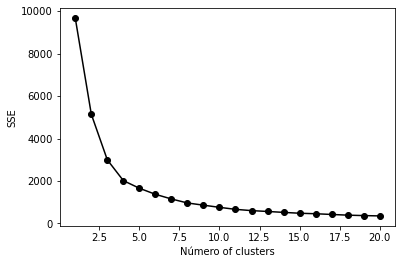

In [ ]:
Col=['Frecuency Actual del Cliente','Monetary Actual','$(F \times W_F + M \times W_M)$']
# Col=['Frecuency Actual del Cliente (Escala ln)','Monetary Actual (Escala ln)', '$(F \times W_F + M \times W_M)$']
Y_std=Curva_kmeans(RFM_df[RFM_df['Actividad del cliente']=='Activo']
             ,Col)

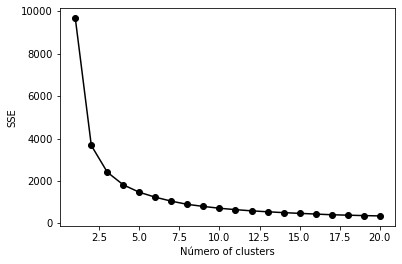

In [ ]:
# Col=['Frecuency Actual del Cliente','Monetary Actual','$(F \times W_F + M \times W_M)$']
Col=['Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)'
     , '$(F \times W_F + M \times W_M)$']
Y_std=Curva_kmeans(RFM_df[RFM_df['Actividad del cliente']=='Activo']
             ,Col)

### Combinación lineal de  de variables 
`Columnas_def(X_std):`

Cantidad de columnas 3


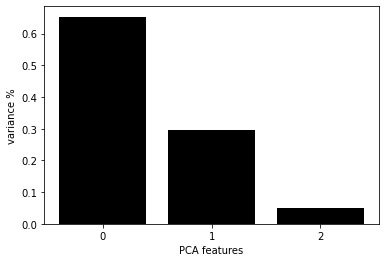

In [ ]:
#grafica de los features
from sklearn.decomposition import PCA
def Columnas_def(X_std):
    print('Cantidad de columnas',len(list(X_std.columns)))

    # Crear una instancia PCA: pca
    pca = PCA()
    principalComponents = pca.fit_transform(X_std)

    # Graficar el porcetanje de la varianza que es explicada por cada componente
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_ratio_, color='black')
    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)

    # Guardar las componentes en un dataframe
    PCA_components = pd.DataFrame(principalComponents)
#     return(PCA_components)
Columnas_def(Y_std)

In [ ]:
Y_std.head()

,Frecuency Actual del Cliente,Monetary Actual,$(F \times W_F + M \times W_M)$
0,1.921061,0.192404,1.571879
1,-0.078261,-0.309912,-0.111587
2,-0.355916,-0.260296,0.000821
3,-0.665520,-0.313561,-0.774537
4,-0.813113,-0.307020,-1.316039


# Proceso de Clustering 

El proceso de Clustering que respecta a la estandarización de los datos, no se requiere de aplicar el estandar min max antes

[MIN MAX](https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79)

## Función De K-Means 
`def_Col_cluster(D_Clientes,Col,Numero_de_clusters):`


#### Def
Contruye atributos, que resultan ser una combinación lineal entre las variables, con el fin de plotear los datos

In [ ]:
def def_Col_cluster(D_Clientes, Col 
                    , Numero_de_clusters, ln_Col_tra=False):
        
#     print(Numero_de_clusters)

    # Col=list(D_Clientes.columns)#=D_Clientes.fillna(0)
    # Col=Col[Col.index('Frecuencia mes promedio'):]
    # Col

    X=D_Clientes.fillna(0).copy()
    if(ln_Col_tra):
        X_std =data_ln(X[Col],Col,True).copy()
    X_std=X[Col].copy()
#     for s in ['Frecuency Actual del Cliente',
#              'Monetary Actual']:
#         if(s in Col):
#             print(s)
#             X_std[s]=\
#             X_std[s].apply(lambda x: np.log(x))
    
    #from sklearn.preprocessing import StandardScaler
    
    
    X_std = pd.DataFrame(StandardScaler().fit_transform(X_std),columns=X_std.columns)
    
    #=========================================
    # Modelo Kmenas
    #=========================================
    #from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=Numero_de_clusters)
    kfit = kmeans.fit(X_std)
    identified_clusters = kfit.predict(X_std)
    X['identified_clusters']=identified_clusters
    X['identified_clusters']=X['identified_clusters'].astype('category')
    
    if( 'Frecuency Actual del Cliente' in X.columns ):
        X['F-1']= X['Frecuency Actual del Cliente'].apply(lambda x: x**(-1))
    return(X)

In [ ]:
#=========================================
# Modelo Kmenas
#=========================================
def def_Col_cluster(D_Clientes, Col 
                    ,Numero_de_clusters
                    ,ln_Col_tra=False
                    ,Standar_Boolean =True
                    ):
    """
    Este modelo no considera variables categoricas
    D_Clientes:DataFrame con las columnas a utilizar
    Col: Atributos a utilizar para el clustering, 
        Array con listado de columnas a usar.
    ,ln_Col_tra=False, True if se requiere hacer escalado Ln
    ,Max_Min_Bul=True, True if  se requiere hacer escalado Min Max
    
    Utiliza:
    data_ln()
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    import pandas as pd
    """ 
    X=D_Clientes[Col].fillna(0).copy()
    
    #if requiere estandarización Ln
    if(ln_Col_tra):
        X_std =data_ln(X[Col],Col,True).copy()
    X_std=X[Col].copy()

    #if requiere estandarización Max_Min
    if(Standar_Boolean):
        X_std = pd.DataFrame(
                #Array, con la Estandarización
                StandardScaler()\
                .fit_transform(X_std)
                ,columns=X_std.columns)
    
    #=========================================
    # Modelo Kmenas
    #=========================================
    
    kmeans = KMeans(n_clusters=Numero_de_clusters)
    kfit = kmeans.fit(X_std)
    identified_clusters = kfit.predict(X_std)
    X['identified_clusters']=identified_clusters
    X['identified_clusters']=X['identified_clusters'].astype('category')
    
    if( 'Frecuency Actual del Cliente' in X.columns ):
        X['F-1']= X['Frecuency Actual del Cliente'].apply(lambda x: x**(-1))
    return(X)

##### Resultado 

In [ ]:
print(Col)

['Frecuency Actual del Cliente (Escala Min Max) (Escala ln)', 'Monetary Actual (Escala Min Max) (Escala ln)', '$(F \times W_F + M \times W_M)$']


In [ ]:
def_Col_cluster(RFM_df[RFM_df['Actividad del cliente']=='Activo'],Col,5).head(3)

5


,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln),$(F \times W_F + M \times W_M)$,identified_clusters,F-1
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390,-4.189531,1,4.956570
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767,-7.828217,2,16.845022
3,10023880,47,0.039591,38390.000000,Activo,-2.537324,-5.047931,-7.585255,2,25.258465


In [ ]:
df_resultado=def_Col_cluster(RFM_df[RFM_df['Actividad del cliente']=='Activo'],Col,5)
df_resultado.groupby('identified_clusters').mean().T

5


identified_clusters,0,1,2,3,4
Recency Actual,13.913819,32.537791,48.704867,19.726688,5.578207
Frecuency Actual del Cliente,0.087501,0.024236,0.009624,0.065479,0.173702
Monetary Actual,40051.292821,31893.226248,28968.303799,441269.481210,96724.352897
Frecuency Actual del Cliente (Escala Min Max) (Escala ln),-1.828918,-3.168093,-4.408850,-2.298469,-1.104064
Monetary Actual (Escala Min Max) (Escala ln),-5.101207,-5.614249,-5.864020,-2.238373,-3.752322
$(F \times W_F + M \times W_M)$,-6.930124,-8.782342,-10.272870,-4.536841,-4.856387
F-1,14.487190,46.717067,116.039143,25.988681,7.160808


## Clustering con ajuste de W 

### Ajuste previo a $W$ 

 we checked the values from 0 to 10 with step size of 0.1 for each of the Frequency and Monetary and tried to select the best values according to the result of clustering.

data RFM a usar `RFM_Customers`
Se trabaja con `data_ln` (`data_Min_Max`)
`df_RFM`

In [ ]:
df_RFM=data_ln(#dx
data_Min_Max(RFM_Customers
,['Frecuency Actual del Cliente','Monetary Actual']#Min_Max_col
,False #drop_columns
)
,['Frecuency Actual del Cliente (Escala Min Max)',
       'Monetary Actual (Escala Min Max)']#ln_col
,True #drop_columns
)
df_RFM.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln)
0,10003742,521,0.003344,28600.000000,Fugado,-7.487191,-5.854068
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767
3,10023880,47,0.039591,38390.000000,Activo,-2.537324,-5.047931
4,10028999,32,0.017541,29060.307692,Activo,-3.463699,-5.797435


### Estudio de la data RFM 

#### Tabla descriptiva de actividad de Recency

In [ ]:
Dic_col['RFM Customers']


['Recency Actual', 'Frecuency Actual del Cliente', 'Monetary Actual']

In [ ]:
df_RFM['F-1']= \
df_RFM['Frecuency Actual del Cliente'].apply(lambda x: x**(-1))

df_RFM['Monetary Actual en Miles de CLP']=\
df_RFM['Monetary Actual'].apply(lambda x: x/10**3)


df_RFM.groupby('Actividad del cliente').describe()\
[['Recency Actual', 'Monetary Actual en Miles de CLP']+['F-1']].T

Actividad del cliente                       Activo       Fugado    Fugandose
Recency Actual                  count  3222.000000   619.000000  1232.000000
                                mean     25.846369   565.670436   194.227273
                                std      25.994297   202.613565    78.355303
                                min       0.000000   367.000000    91.000000
                                25%       4.000000   446.500000   123.000000
                                50%      14.000000   517.000000   180.000000
                                75%      46.000000   567.000000   257.000000
                                max      90.000000  1369.000000   365.000000
Monetary Actual en Miles de CLP count  3222.000000   619.000000  1232.000000
                                mean     83.982652    45.807119    43.556071
                                std     175.184008   102.141003    92.623650
                                min      24.200000    20.700000    23.057500
                                25%      29.134286    26.357100    27.692042
                                50%      32.110014    27.940000    28.903379
                                75%      62.506269    30.580000    31.020000
                                max    2754.332565  1464.775455  1671.401125
F-1                             count  3222.000000   619.000000  1232.000000
                                mean     44.703850   201.138451   126.543228
                                std      45.089780    97.778260    75.073496
                                min       2.166226     7.473199     2.405220
                                25%      10.979255   113.469567    70.612220
                                50%      29.878182   184.516747   115.243817
                                75%      64.000000   299.000000   172.012713
                                max     318.729413   323.172367   324.057865

In [ ]:
print(df_RFM.groupby('Actividad del cliente').describe()\
[['Recency Actual', 'Monetary Actual en Miles de CLP']+['F-1']].T.round(1)\
      .to_latex())

\begin{tabular}{llrrr}
\toprule
    & Actividad del cliente &  Activo &  Fugado &  Fugandose \\
\midrule
Recency Actual & count &  3222.0 &   619.0 &     1232.0 \\
    & mean &    25.8 &   565.7 &      194.2 \\
    & std &    26.0 &   202.6 &       78.4 \\
    & min &     0.0 &   367.0 &       91.0 \\
    & 25\% &     4.0 &   446.5 &      123.0 \\
    & 50\% &    14.0 &   517.0 &      180.0 \\
    & 75\% &    46.0 &   567.0 &      257.0 \\
    & max &    90.0 &  1369.0 &      365.0 \\
Monetary Actual en Miles de CLP & count &  3222.0 &   619.0 &     1232.0 \\
    & mean &    84.0 &    45.8 &       43.6 \\
    & std &   175.2 &   102.1 &       92.6 \\
    & min &    24.2 &    20.7 &       23.1 \\
    & 25\% &    29.1 &    26.4 &       27.7 \\
    & 50\% &    32.1 &    27.9 &       28.9 \\
    & 75\% &    62.5 &    30.6 &       31.0 \\
    & max &  2754.3 &  1464.8 &     1671.4 \\
F-1 & count &  3222.0 &   619.0 &     1232.0 \\
    & mean &    44.7 &   201.1 &      126.5 \\
    & std &  

#### Grafico Dispersion de los cliente frente  a F M ajustado

In [ ]:
df_RFM.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)', 'F-1',
       'Monetary Actual en Miles de CLP'],
      dtype='object')

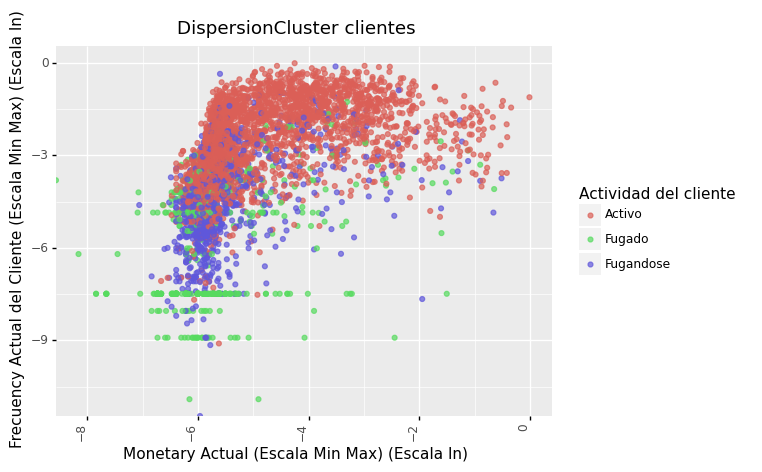

<ggplot: (152419626102)>

In [ ]:

(
    ggplot( df_RFM
           , aes(y='Frecuency Actual del Cliente (Escala Min Max) (Escala ln)'
                 ,x='Monetary Actual (Escala Min Max) (Escala ln)'
                 ,fill='Actividad del cliente'
                ,color='Actividad del cliente'
                         ))\
#                 + labs(y='Disposición a pagar')\
                + geom_point(
#         aes(color='Cluster de Clientes'),
        alpha=0.7)\
#                 +geom_smooth()\
#                 +ggtitle(('Dispersión Clusters Clientes'+
#                           ' \n Disposición a pagar v/s '+
#                          'Cluster de Semana'))\
            +ggtitle('DispersionCluster clientes'
#                      '\n ($W_M $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                     )
               +theme(axis_text_x = element_text(angle=90, hjust=1))\


    )


### Caso pequeño de data Clustering con RFM 

#### Creo data con un caso de w_f,w_m=(1,1)

`RFM_df_i`

In [ ]:
w_f,w_m=(1,1)
RFM_df_i=Df_Pond_FxM(df_RFM\
                     [df_RFM['Actividad del cliente']=='Activo']
                     ,[ 
        'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)']
                     ,w_f,w_m)
RFM_df_i.head(2)

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln),F-1,Monetary Actual en Miles de CLP,$(F \times W_F + M \times W_M)$
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390,4.956570,117.683471,-4.189531
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767,16.845022,29.699449,-7.828217


#### Realizo el clustering es guardado el resultado en  
`rfm_clust`

In [ ]:
rfm_clust=def_Col_cluster(
    RFM_df_i[RFM_df_i['Actividad del cliente']=='Activo']
    ,['Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
     'Monetary Actual (Escala Min Max) (Escala ln)',
     '$(F \times W_F + M \times W_M)$']
    ,5)
rfm_clust.groupby('identified_clusters').mean().T

5


identified_clusters,0,1,2,3,4
Recency Actual,48.847244,5.578207,32.547225,19.726688,14.005882
Frecuency Actual del Cliente,0.009612,0.173702,0.024089,0.065479,0.087041
Monetary Actual,28967.026715,96724.352897,31870.104060,441269.481210,39994.823886
Frecuency Actual del Cliente (Escala Min Max) (Escala ln),-4.410836,-1.104064,-3.173946,-2.298469,-1.835659
Monetary Actual (Escala Min Max) (Escala ln),-5.864324,-3.752322,-5.616106,-2.238373,-5.104134
F-1,116.173556,7.160808,46.919291,25.988681,14.591922
Monetary Actual en Miles de CLP,28.967027,96.724353,31.870104,441.269481,39.994824
$(F \times W_F + M \times W_M)$,-10.275160,-4.856387,-8.790052,-4.536841,-6.939794


#### Grafico de dispersión de los clusters

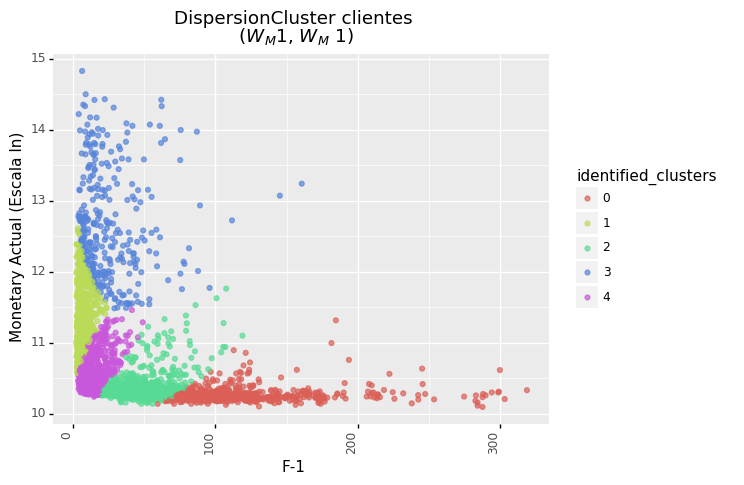

<ggplot: (152424162669)>

In [ ]:
rfm_clust['Monetary Actual \n en Millones de CLP']=\
rfm_clust['Monetary Actual'].apply(lambda x: x/10**6)
#GGplot
(
    ggplot(
#             rfm_clust
        data_ln(rfm_clust, ['Frecuency Actual del Cliente',
                                 'Monetary Actual'],False)
           , aes(y='Monetary Actual'+' (Escala ln)'
#                  'Monetary Actual \n en Millones de CLP',
                ,x='F-1'
                #'Frecuency Actual del Cliente'
                #'F-1'
                 ,fill='identified_clusters'
                ,color='identified_clusters'
                         ))\
#                 + labs(y='Disposición a pagar')\
                + geom_point(
#         aes(color='Cluster de Clientes'),
        alpha=0.7)\
#                 +geom_smooth()\
#                 +ggtitle(('Dispersión Clusters Clientes'+
#                           ' \n Disposición a pagar v/s '+
#                          'Cluster de Semana'))\
            +ggtitle('DispersionCluster clientes'+
                     '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                     )
               +theme(axis_text_x = element_text(angle=90, hjust=1))\


    )


# Prueba con OLS 

## Merge Cluster 

In [ ]:
data_i_RFM_week.shape

(198596, 24)

In [ ]:
#son clientes activos por el R
pd.merge( rfm_clust[['Cliente','identified_clusters']]
         ,data_i_RFM_week
         ,how='left'
        ).shape

(180375, 25)

In [ ]:
198596-180375

18221

In [ ]:
rfm_clust.columns

Index(['Cliente', 'Recency Actual', 'Frecuency Actual del Cliente',
       'Monetary Actual', 'Actividad del cliente',
       'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
       'Monetary Actual (Escala Min Max) (Escala ln)', 'F-1',
       'Monetary Actual en Miles de CLP', '$(F \times W_F + M \times W_M)$',
       'identified_clusters', 'Monetary Actual \n en Millones de CLP'],
      dtype='object')

## Función Pred Cluster 

>`Func_log_log_Tip_ind_cluster()`
    
   >> `X_set(X,Ridge_mod):`


###### DEf 

In [ ]:
import sklearn
import statsmodels.api as sm
from sklearn.linear_model import Ridge
def X_set(X,Ridge_mod):
    """
    X_set(X= Data frame con las columnas de X
    ,Ridge_mod= Variabel True si se usará ridge
                False si se desea incorporar el intercepto
    )
    """
    
    X_Set_Def=X.copy()

    #=======================================================
    # Ajuste Log Kilos de Venta
    X_Set_Def['Kilos Venta KG']=X_Set_Def['Kilos Venta KG']\
                                    .apply(lambda x: np.log(x))
    #=======================================================
    # Ajuste Categorico a dif Variables
    if('Año' in X_Set_Def.columns):
        X_Set_Def['Año']=X_Set_Def['Año'].astype('int64')
        X_Set_Def['Año']= X_Set_Def['Año']-X_Set_Def['Año'].min() #2018
    
    if('Semana' in X_Set_Def.columns):
        X_Set_Def['Semana']=X_Set_Def['Semana'].astype('category')

    if('Tipo de Semana' in X_Set_Def.columns):
        X_Set_Def['Tipo de Semana']=X_Set_Def['Tipo de Semana']\
                .astype('category')
    if('identified_clusters' in X_Set_Def.columns):
        X_Set_Def['identified_clusters']=X_Set_Def['identified_clusters']\
                .astype('category')
    #-----------------------------------------------------------------
#     print(X_Set_Def.dtypes,'\n'+'='*50)

    # Dummies
    X_Set_Def=pd.get_dummies(X_Set_Def, drop_first=True)
    
#      OLS requiere de un intercepto
    if(Ridge_mod==False):
        X_Set_Def['Intecepto']=[1 for i in range(X_Set_Def.shape[0])]
    
    return(X_Set_Def)

def Func_log_log_Tip_ind_cluster(Data_F,Ridge_mod):
    """
    Entrega el (R train ,R Test)
    """
    
    #===================================
    #Ajuste de los datos
    #-----------------------------------
#     
    X_Columnas=['Kilos Venta KG','Año','identified_clusters','Tipo de Semana']
    y_pred_Columna='Precio'

    y=Data_F[y_pred_Columna].copy()
    X=X_set(Data_F[ X_Columnas ].copy(),Ridge_mod)


    #Aplico Ln a y
    y=y.apply(lambda x: np.log(x))


    #Calculo de la correlación entre variables
    
#     print('Correlación Variables sobre la Variable ', y_pred_Columna,
#         '\n'+'-'*50+'\n' ,pd.merge(y.reset_index(),X.reset_index()).corr()[y_pred_Columna])

    #===================================
    # Entrenamiento
    #-----------------------------------
    #SPLIT TEST OR TRAIN
    X_train, X_test, y_train, y_test = \
            train_test_split(X, y, random_state=0)
    #-----------------------------------
    # TRAIN MODEL
    if(Ridge_mod):
        #Entraniemnto
        ridge = Ridge(alpha=0.23272024789604073).fit(X_train, y_train)
        #R Score 
        R_test=ridge.score(X_test, y_test)
        R_test=ridge.score(X_test, y_test)
#         print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
#         print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
#         return(ridge)
#         return(str("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
#                +'  '
#                 +str("Test set score: {:.2f}".format(ridge.score(X_test, y_test))))
        return(
                (ridge.score(X_train, y_train).round(3)),
                (ridge.score(X_test, y_test).round(3))
        )
        
    else:
        mod = sm.OLS(y_train,X_train)
        fii = mod.fit()
#         print('$R^2$ Data Train'  ,sklearn.metrics.r2_score(y_train,fii.predict()).round(3) )
#         print('$R^2$ Data Test'  ,sklearn.metrics.r2_score(y_test,fii.predict(exog=X_test)).round(3))
        return( #'$R^2$ Data Train' + 
               (sklearn.metrics.r2_score(y_train,fii.predict()).round(3) )
#                 '$R^2$ Data Test'   + 
                ,(sklearn.metrics.r2_score(y_test,fii.predict(exog=X_test)).round(3))
                )

        #==========================================
        # Todos los datos, desde ell 2018
        # $R^2$ Data Train 0.4378602682377155
        # $R^2$ Data Test 0.43860226392178925
#         return(fii)

###### Resultado

In [ ]:
Func_log_log_Tip_ind_cluster(
        pd.merge( rfm_clust[['Cliente','identified_clusters']]
         ,data_i_RFM_week
         ,how='left'
        ),True)


(0.472, 0.461)

In [ ]:
def Fun_R_resulatado( Data_customers,Data_Fact ,Ridege_Bul=True):
        return (Func_log_log_Tip_ind_cluster(
        pd.merge( Data_customers[['Cliente','identified_clusters']]
         ,Data_Fact
         ,how='left'
        ),Ridege_Bul))
Fun_R_resulatado(rfm_clust,data_i_RFM_week )

(0.472, 0.461)

## Parte iterativa Para estimar el W 

###### proceso 

In [ ]:

Array_W_F_M=list()
for i in range(0,11):
    w_f=np.round((i*0.1),2)
    for j in range(0,11):
        w_m=np.round((j*0.1),2)
        Array_W_F_M.append((w_f,w_m))
len(Array_W_F_M)



121

In [ ]:
df_RFM.head()

,Cliente,Recency Actual,Frecuency Actual del Cliente,Monetary Actual,Actividad del cliente,Frecuency Actual del Cliente (Escala Min Max) (Escala ln),Monetary Actual (Escala Min Max) (Escala ln),F-1,Monetary Actual en Miles de CLP
0,10003742,521,0.003344,28600.000000,Fugado,-7.487191,-5.854068,299.000000,28.600000
1,10007508,0,0.201752,117683.471154,Activo,-0.843141,-3.346390,4.956570,117.683471
2,10017269,3,0.059365,29699.448718,Activo,-2.104450,-5.723767,16.845022,29.699449
3,10023880,47,0.039591,38390.000000,Activo,-2.537324,-5.047931,25.258465,38.390000
4,10028999,32,0.017541,29060.307692,Activo,-3.463699,-5.797435,57.008334,29.060308


##### Iteración 

###### For For 

In [ ]:
Array_W_F_M=list()
Array_DATA_W_F_M=list()

DF_VAL_ARRAY=list()
#Valores F
for i in range(0,11):
    w_f=np.round((i*0.1),2)
    #Valores M
    for j in range(0,11):
        w_m=np.round((j*0.1),2)
        
        #Combinatoria W_F y W_M
        Array_W_F_M.append((w_f,w_m))
        #Dataframe a usar
        RFM_df_i=Df_Pond_FxM(
            #DataFrame
            df_RFM\
            [df_RFM['Actividad del cliente']=='Activo']
             ,[ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
               'Monetary Actual (Escala Min Max) (Escala ln)']
                     ,w_f,w_m)
        #DAta Frame del Claster
        rfm_clust_i = \
        def_Col_cluster(
            #DataFrame
            RFM_df_i[RFM_df_i['Actividad del cliente']=='Activo']
            #Columnas
            ,['Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
             'Monetary Actual (Escala Min Max) (Escala ln)',
             '$(F \times W_F + M \times W_M)$']
            #K numero
            ,5)
        #Guardado de R2 Train Test
        R_rfm=Fun_R_resulatado(rfm_clust_i,data_i_RFM_week )
        DF_VAL_ARRAY.append(
            [w_f,w_m,R_rfm[0],R_rfm[1]]
        )
#         Array_DATA_W_F_M.append()
# len(Array_W_F_M)
# len(Array_DATA_W_F_M)

###### Data 

In [ ]:
Resultados_DF=pd.DataFrame(  
            DF_VAL_ARRAY
            ,columns=['$W_F$','$W_M$','$R^2 Train$','$R^2 Test$']
            )
Resultados_DF.head()

,$W_F$,$W_M$,$R^2 Train$,$R^2 Test$
0,0.0,0.0,0.472,0.462
1,0.0,0.1,0.469,0.459
2,0.0,0.2,0.469,0.460
3,0.0,0.3,0.469,0.460
4,0.0,0.4,0.469,0.459


In [ ]:
Resultados_DF['$R^2 Mean$']=(Resultados_DF['$R^2 Train$']+Resultados_DF['$R^2 Test$'])/2

In [ ]:
Resultados_DF.describe()

,$W_F$,$W_M$,$R^2 Train$,$R^2 Test$,$R^2 Mean$
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.500000,0.500000,0.471818,0.461413,0.466616
std,0.317543,0.317543,0.002723,0.002421,0.002560
min,0.000000,0.000000,0.468000,0.457000,0.462500
25%,0.200000,0.200000,0.469000,0.459000,0.464000
50%,0.500000,0.500000,0.472000,0.462000,0.467000
75%,0.800000,0.800000,0.475000,0.464000,0.469500
max,1.000000,1.000000,0.475000,0.465000,0.470000


In [ ]:
Resultados_DF.sort_values(by='$R^2 Mean$',ascending=False)
# ['$R^2 Mean$']

,$W_F$,$W_M$,$R^2 Train$,$R^2 Test$,$R^2 Mean$
115,1.0,0.5,0.475,0.465,0.4700
46,0.4,0.2,0.475,0.465,0.4700
90,0.8,0.2,0.475,0.464,0.4695
78,0.7,0.1,0.475,0.464,0.4695
91,0.8,0.3,0.475,0.464,0.4695
...,...,...,...,...,...
42,0.3,0.9,0.468,0.458,0.4630
38,0.3,0.5,0.468,0.458,0.4630
39,0.3,0.6,0.468,0.458,0.4630
14,0.1,0.3,0.468,0.457,0.4625


In [ ]:
Resultados_DF[Resultados_DF['$R^2 Mean$']==0.470000]

,$W_F$,$W_M$,$R^2 Train$,$R^2 Test$,$R^2 Mean$
46,0.4,0.2,0.475,0.465,0.47
115,1.0,0.5,0.475,0.465,0.47


###### Grafica Combinando W
Grafica de valoración de de cada combinatoria de $(W_F,W_M)$

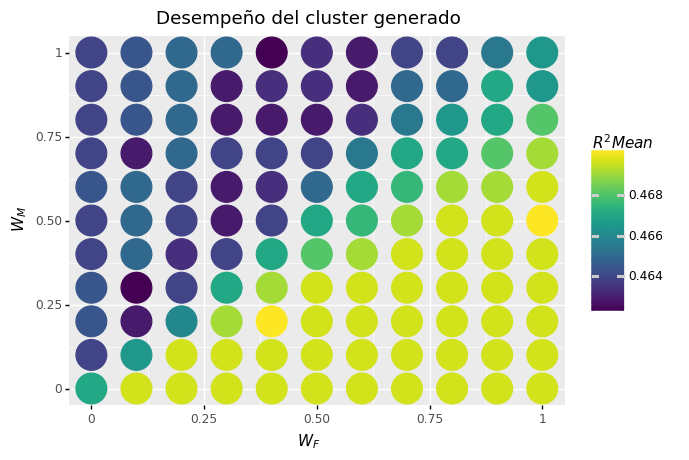

<ggplot: (152428311089)>

In [ ]:
R2_G_W_mf=ggplot(Resultados_DF
       ,aes(x='$W_F$',
        y='$W_M$'
        ,color='$R^2 Mean$'
        )
    )\
+geom_point(size=12)\
+ggtitle('Desempeño del cluster generado')
R2_G_W_mf

#### Grafico de dispersión de los clusters

1 0.5

###### Data utilizada 

In [ ]:
w_f,w_m=(1,0.5)
RFM_df_x=Df_Pond_FxM(
            #DataFrame
            df_RFM\
            [df_RFM['Actividad del cliente']=='Activo']
             ,[ 'Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
               'Monetary Actual (Escala Min Max) (Escala ln)']
                     ,w_f,w_m)
        #DAta Frame del Claster
rfm_clust_x = \
        def_Col_cluster(
            #DataFrame
            RFM_df_x[RFM_df_x['Actividad del cliente']=='Activo']
            #Columnas
            ,['Frecuency Actual del Cliente (Escala Min Max) (Escala ln)',
             'Monetary Actual (Escala Min Max) (Escala ln)',
             '$(F \times W_F + M \times W_M)$']
            #K numero
            ,5)

##### Grafico de Dispersión F-1 y Monetary 

###### Codigo Grafico 

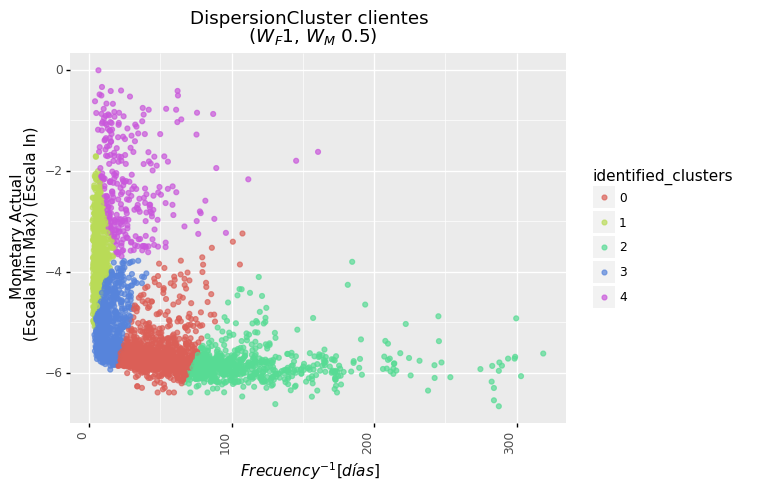

<ggplot: (152424162389)>

In [ ]:
rfm_clust_x['Monetary Actual \n en Millones de CLP']=\
rfm_clust_x['Monetary Actual'].apply(lambda x: x/10**6)
GGplot_rfm_x=\
(
    ggplot(
        #             rfm_clust
        data_ln(rfm_clust_x, ['Frecuency Actual del Cliente',
                             'Monetary Actual'],False)
        , aes(y='Monetary Actual'+' (Escala Min Max) (Escala ln)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='F-1'
            #'Frecuency Actual del Cliente'
            #'F-1'
             ,fill='identified_clusters'
            ,color='identified_clusters'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala Min Max) (Escala ln)')
        +xlab('$Frecuency^{-1} [días]$')
        +ggtitle('DispersionCluster clientes'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(axis_text_x = element_text(angle=90, hjust=1))\


    )
GGplot_rfm_x

###### ploteo 

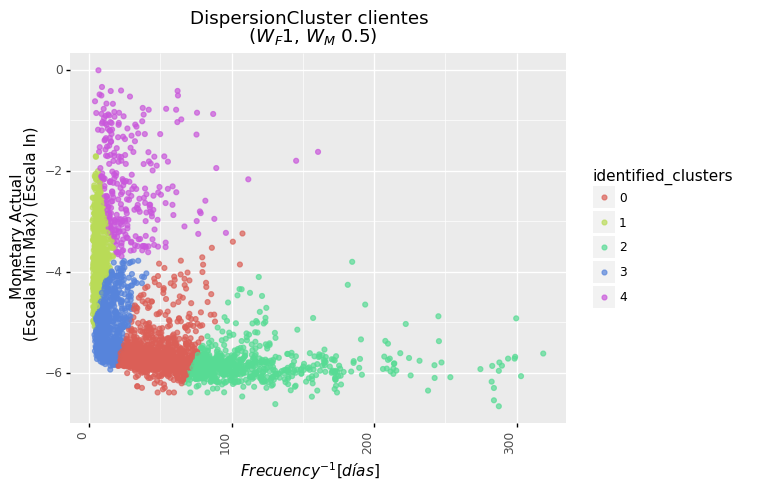

<ggplot: (152424162389)>

In [ ]:
GGplot_rfm_x

##### Grafico de Dispersión F y Monetary  Eslacado a MaxMin Log

###### Codigo Grafico 

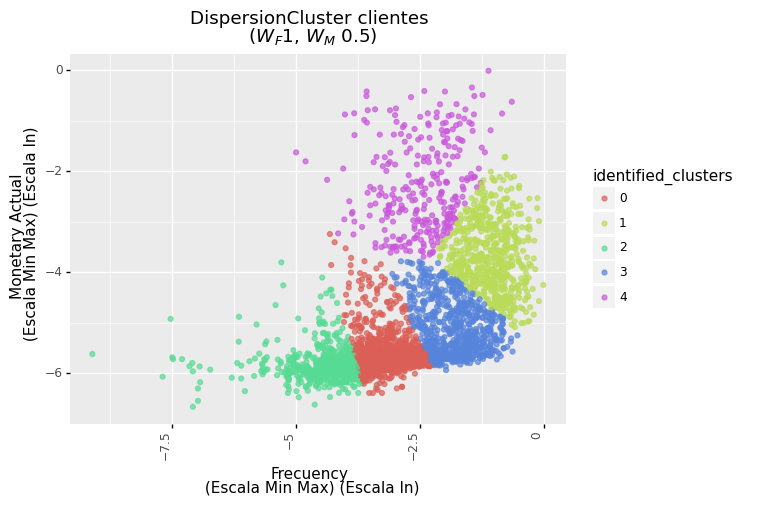

<ggplot: (152428546717)>

In [ ]:
rfm_clust_x['Monetary Actual \n en Millones de CLP']=\
rfm_clust_x['Monetary Actual'].apply(lambda x: x/10**6)
GGplot_rfm_FM=\
(
    ggplot(
        #             rfm_clust
        data_ln(rfm_clust_x, ['Frecuency Actual del Cliente',
                             'Monetary Actual'],False)
        , aes(y='Monetary Actual'+' (Escala Min Max) (Escala ln)'
        #                  'Monetary Actual \n en Millones de CLP',
            ,x='Frecuency Actual del Cliente'+' (Escala Min Max) (Escala ln)'
            #'F-1'
             ,fill='identified_clusters'
            ,color='identified_clusters'
                     ))\
        #                 + labs(y='Disposición a pagar')\
            + geom_point(
        #         aes(color='Cluster de Clientes'),
                alpha=0.7)\
        #                 +geom_smooth()\
        #                 +ggtitle(('Dispersión Clusters Clientes'+
        #                           ' \n Disposición a pagar v/s '+
        #                          'Cluster de Semana'))\
        +ylab('Monetary Actual'+'\n'+' (Escala Min Max) (Escala ln)')
        +xlab('Frecuency'+'\n'+' (Escala Min Max) (Escala ln)')
        +ggtitle('DispersionCluster clientes'+
                 '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                 )
        +theme(axis_text_x = element_text(angle=90, hjust=1))\


    )
GGplot_rfm_FM

###### ploteo 

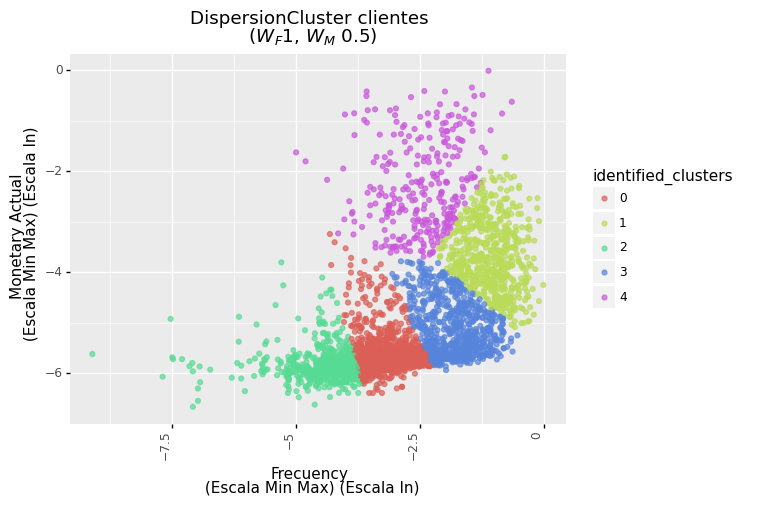

<ggplot: (152428546717)>

In [ ]:
GGplot_rfm_FM

###### Grafico 2, no utilizado 

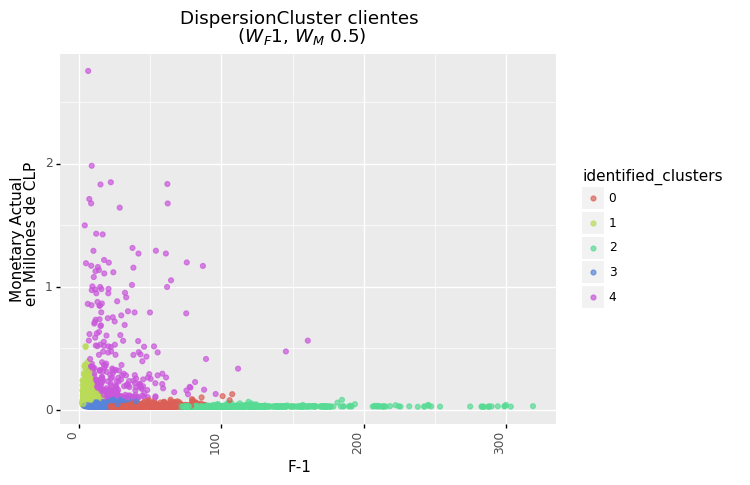

<ggplot: (152428304144)>

In [ ]:
rfm_clust_x['Monetary Actual \n en Millones de CLP']=\
rfm_clust_x['Monetary Actual'].apply(lambda x: x/10**6)
#GGplot
(
    ggplot(
#             rfm_clust
        data_ln(rfm_clust_x, ['Frecuency Actual del Cliente',
                                 'Monetary Actual'],False)
           , aes(y='Monetary Actual \n en Millones de CLP'
#'Monetary Actual'#+' (Escala Min Max) (Escala ln)'
#                  'Monetary Actual \n en Millones de CLP',
                ,x='F-1'
                #'Frecuency Actual del Cliente'
                #'F-1'
                 ,fill='identified_clusters'
                ,color='identified_clusters'
                         ))\
#                 + labs(y='Disposición a pagar')\
                + geom_point(
#         aes(color='Cluster de Clientes'),
        alpha=0.7)\
#                 +geom_smooth()\
#                 +ggtitle(('Dispersión Clusters Clientes'+
#                           ' \n Disposición a pagar v/s '+
#                          'Cluster de Semana'))\
            +ggtitle('DispersionCluster clientes'+
                     '\n ($W_F $'+str(w_f)+', $W_M$ '+str(w_m) +')'
                     )
               +theme(axis_text_x = element_text(angle=90, hjust=1))\


    )


#### PDF Graficos 

In [ ]:
Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

'C:\\Users\\user\\Documents\\Graficos\\Canal Tradicional\\1010078\\Cluster\\RFM'

```python
#============================
#
#============================
file_name=('Clustering r+fm Activo W Disp')
    
pngfill= Png_file_direct_Graphic_Canal_Material+"\\Cluster\\RFM"

start_time = time.time()
save_as_pdf_pages(
                  
                  [ R2_G_W_mf  ,GGplot_rfm_FM, GGplot_rfm_x  ]
                    ,pngfill 
            +"\\"+ file_name + ".pdf")
time_convert(time.time()-start_time)
```